### Load datasets

In [1]:
import pandas as pd

# Statsbomb expected goals dataset
df = pd.read_csv('data/example.csv')
df = df.fillna(0)

### Model evaluation

In [2]:
from fairness.fairness import FairnessEvaluator

fe = FairnessEvaluator(df=df, target='goal', preds=['shot_statsbomb_xg'])
fe.fit(sensitives=['gender', 'country'])

/Users/remi/Documents/Tools/miniconda3/envs/mpg/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std
/Users/remi/Documents/Projetcs/iamatch/fair-xg/fairness/fairness.py:137: RuntimeWarning: divide by zero encountered in double_scalars
  'diff_percent': diff / metric_1['value'],
/Users/remi/Documents/Tools/miniconda3/envs/mpg/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


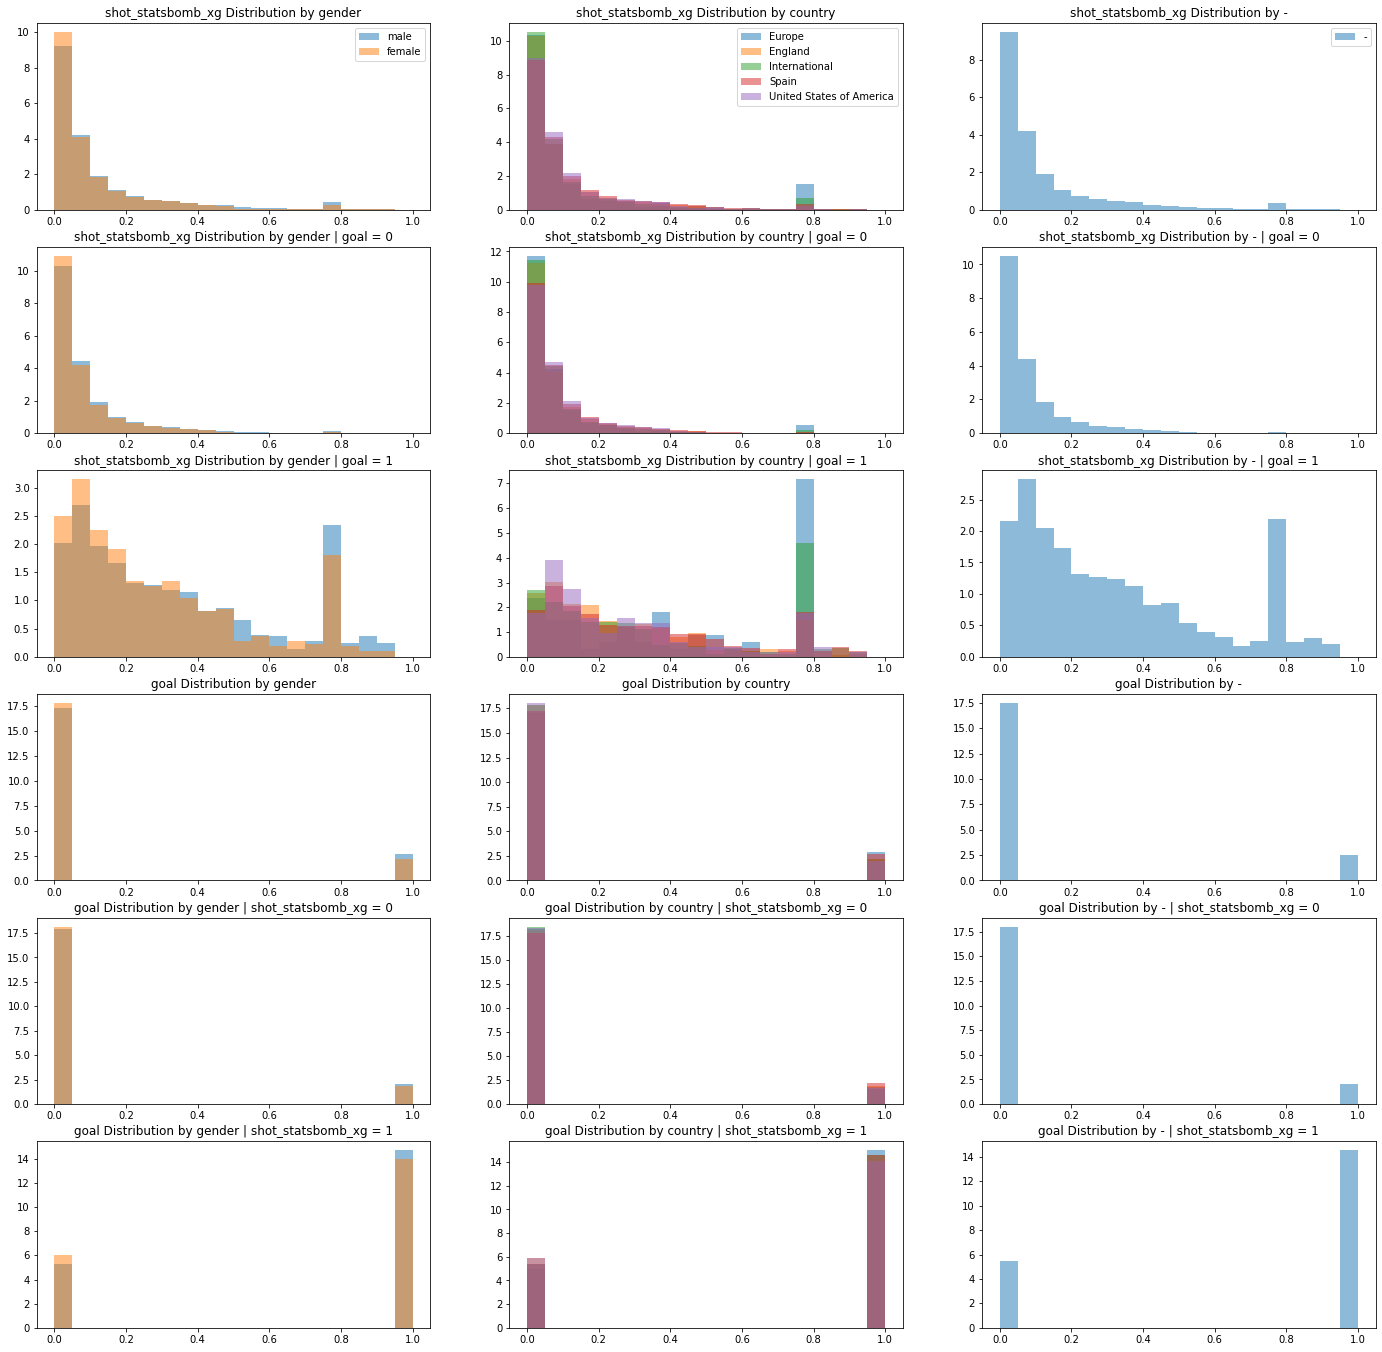

In [3]:
fe.plot_distributions()

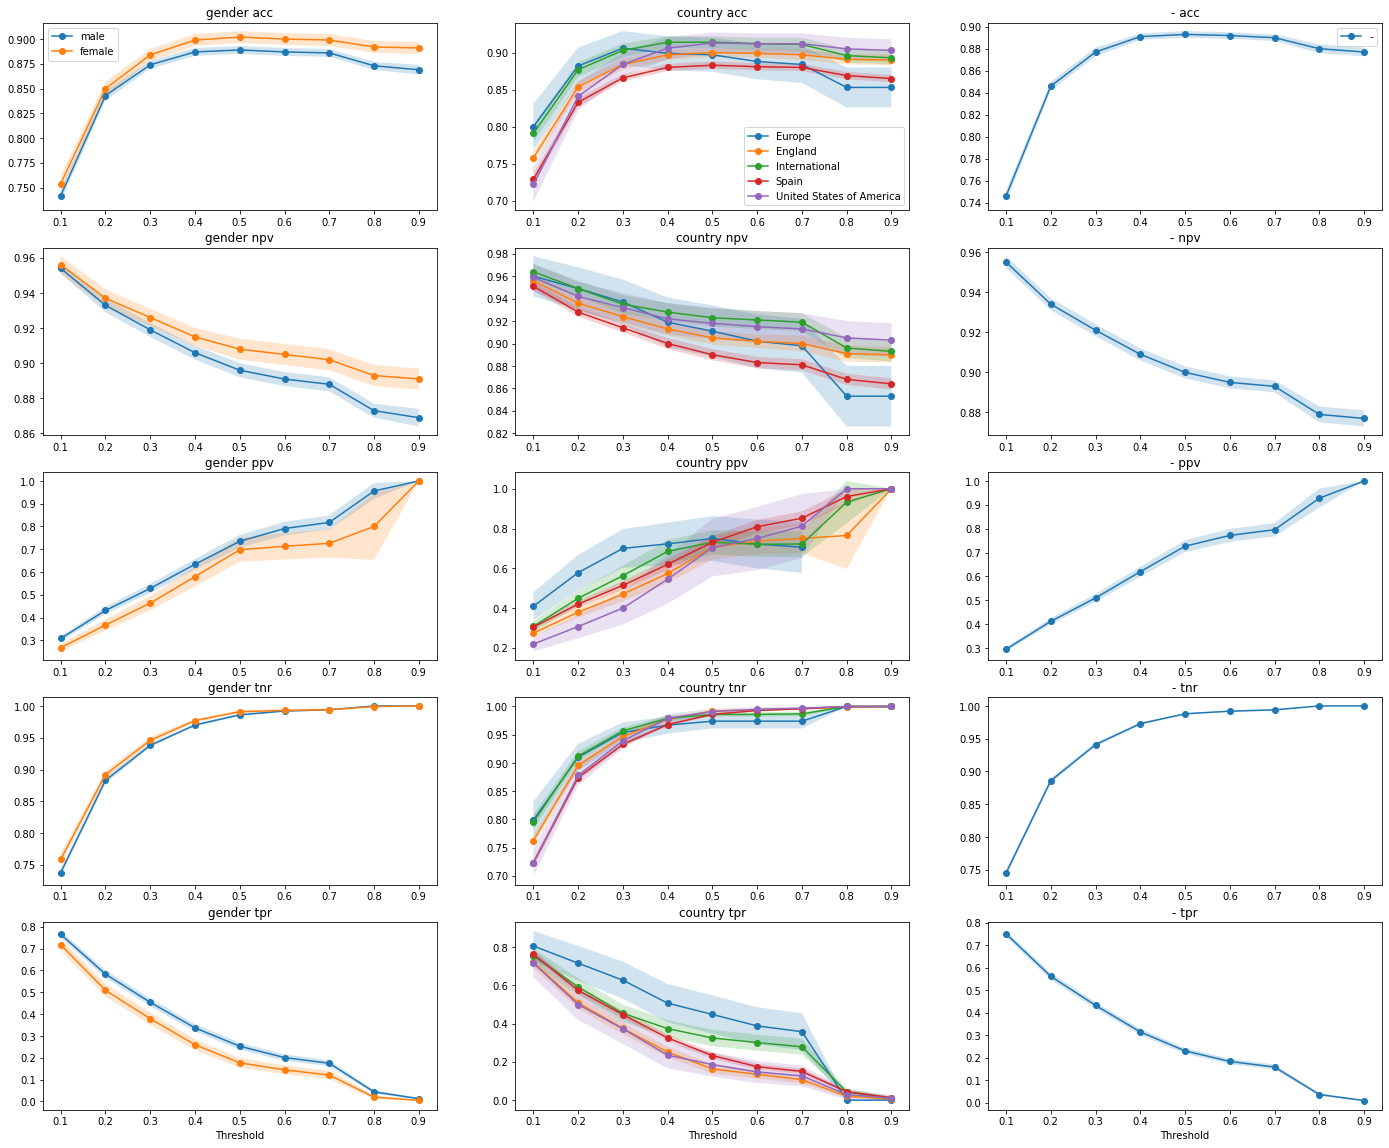

In [4]:
fe.plot_metrics_curves()

In [5]:
fe.get_bias_table(threshold=None)

In [6]:
fe.get_metrics_table(threshold=None)

In [7]:
fe.get_bias_cross_table(sensitive='gender', metric_names=['tpr'], threshold=0.5)

### Models comparison

Random fake xg model

In [8]:
import numpy as np

df['random_xg'] = np.random.rand(len(df))

In [9]:
fe = FairnessEvaluator(df=df, target='goal', preds=['shot_statsbomb_xg', 'random_xg'])
fe.fit(sensitives=['gender', 'country'])

/Users/remi/Documents/Tools/miniconda3/envs/mpg/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std
/Users/remi/Documents/Projetcs/iamatch/fair-xg/fairness/fairness.py:137: RuntimeWarning: divide by zero encountered in double_scalars
  'diff_percent': diff / metric_1['value'],
/Users/remi/Documents/Tools/miniconda3/envs/mpg/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [10]:
fe.compare_bias_table(threshold=0.5)